In [1]:
import cv2

In [2]:
from matplotlib import pyplot as plt

In [3]:
from PIL import Image

In [4]:
import numpy as np

In [5]:
from IPython.display import display, Image as IPythonImage

In [6]:
image_path = "./cyto_driving.jpg"

In [7]:
img0 = cv2.imread(image_path)

In [8]:
def showimg(img):
    # cv2 images are in bgr by default and IPython assumes RGB for display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(img_rgb))

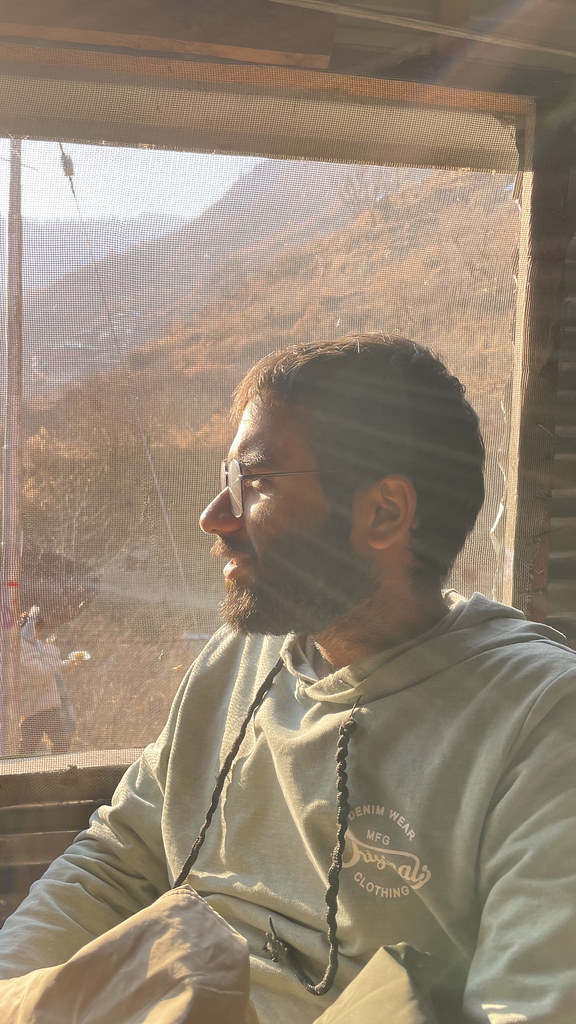

In [9]:
showimg(img0)

# Basic Image Properties
## The following cells extract
- the number of pixels (using size property) of the image
- the size of the image (using shape property)
- the channels of the image

In [10]:
img0.size

1769472

In [11]:
height = img0.shape[0]
width = img0.shape[1]
"{} x {}".format(height, width)

'1024 x 576'

In [12]:
"{} channels in the image".format(img0.shape[2])

'3 channels in the image'

# The grayscale image

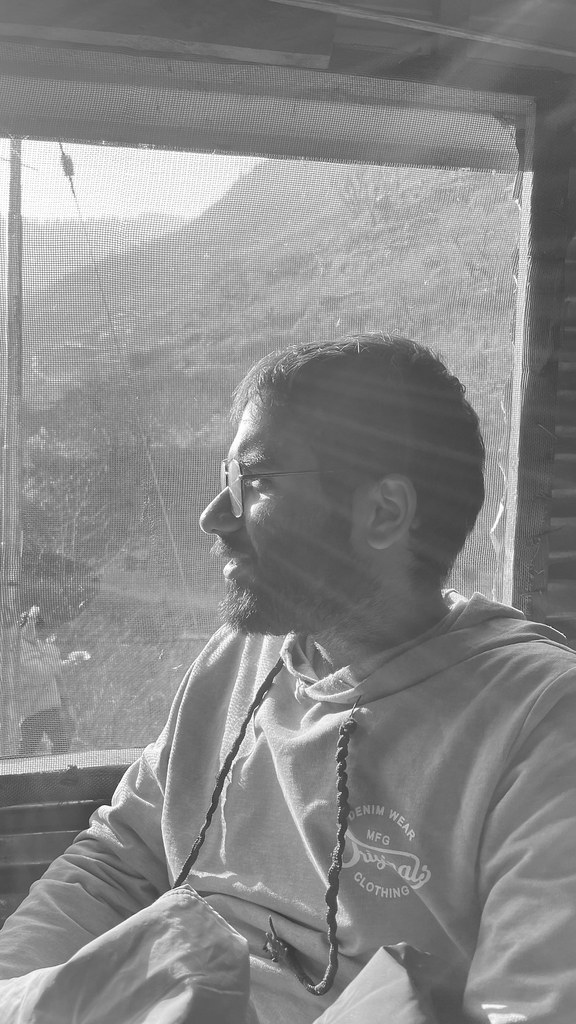

In [13]:
img_gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
display(Image.fromarray(img_gray))

In [14]:
b, g, r = cv2.split(img0)


b_padded = cv2.merge([b, np.zeros_like(b), np.zeros_like(b)])
g_padded = cv2.merge([np.zeros_like(g), g, np.zeros_like(g)])
r_padded = cv2.merge([np.zeros_like(r), np.zeros_like(r), r])

# The 3 channels of the image

## Blue Channel

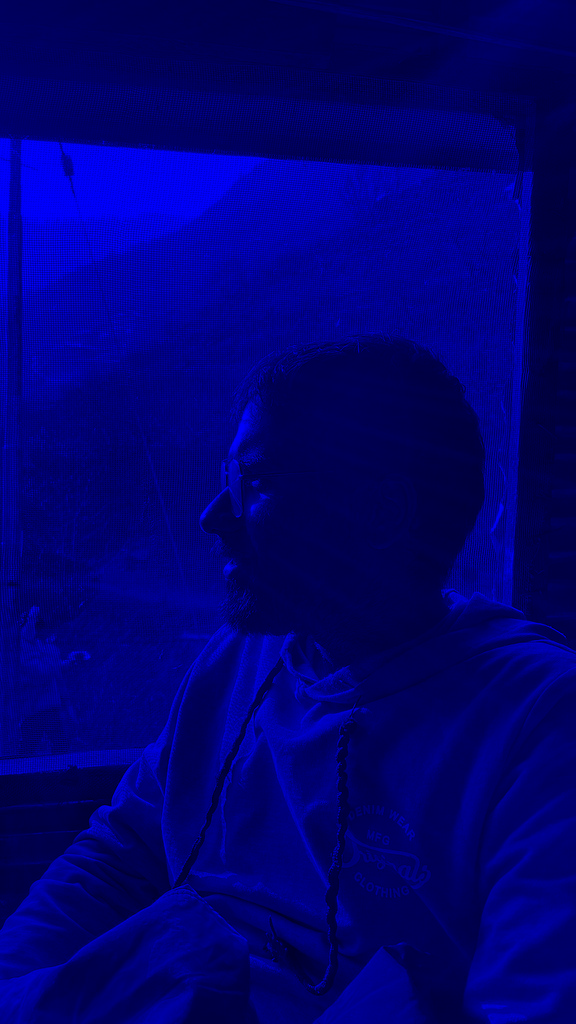

In [15]:
showimg(b_padded)

## Green Channel

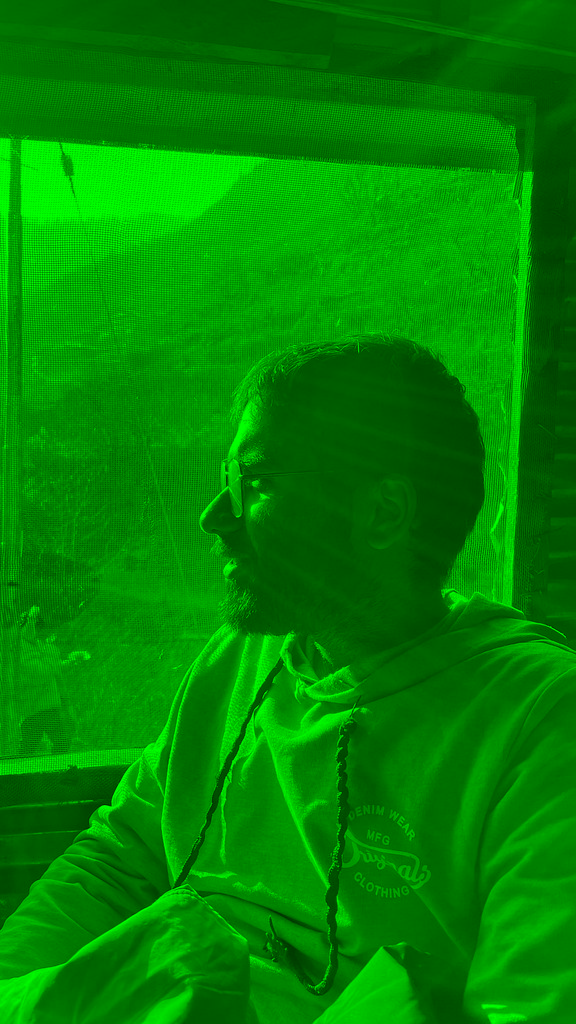

In [16]:
showimg(g_padded)

## Red Channel

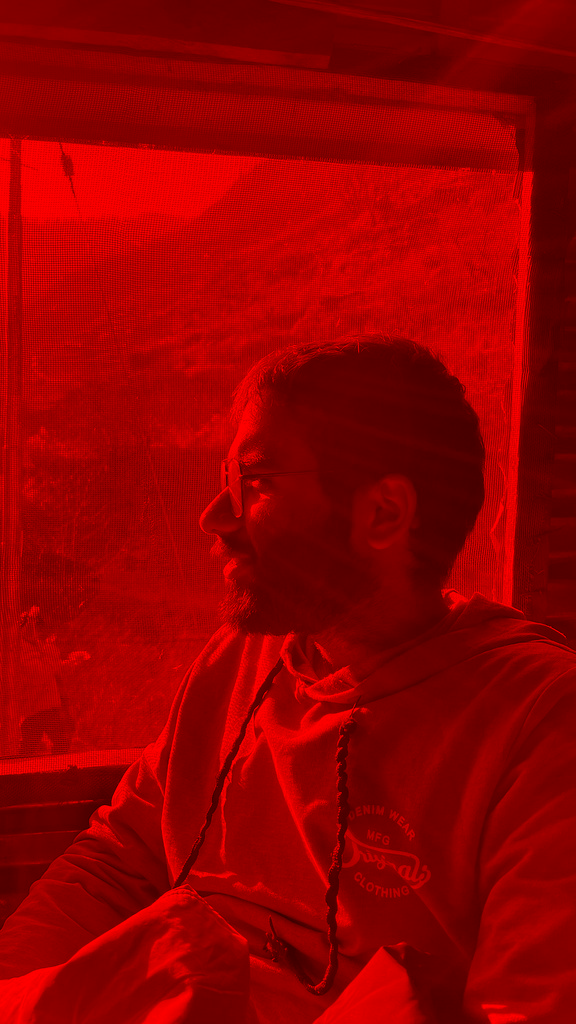

In [17]:
showimg(r_padded)

# Scaling

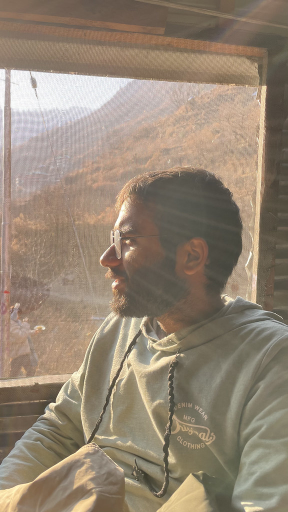

In [18]:
img_resized  = cv2.resize(img0,(int(width/2),int(height/2)),interpolation=cv2.INTER_LINEAR)
showimg(img_resized)

# Rotation

Rotation matrix looks like

$$ \begin{bmatrix} x^{\prime} \\ y^{\prime} \\ 1 \end{bmatrix} = \begin{bmatrix} cos(\theta) & -sin(\theta) & c_x(1 - cos(\theta)) + c_y sin(\theta) \\ sin(\theta) & cos(\theta) & c_y(1 - cos(\theta)) + c_x sin(\theta) \end{bmatrix} \cdot \begin{bmatrix} x - c_x \\ y - c_y \\ 1 \end{bmatrix} $$


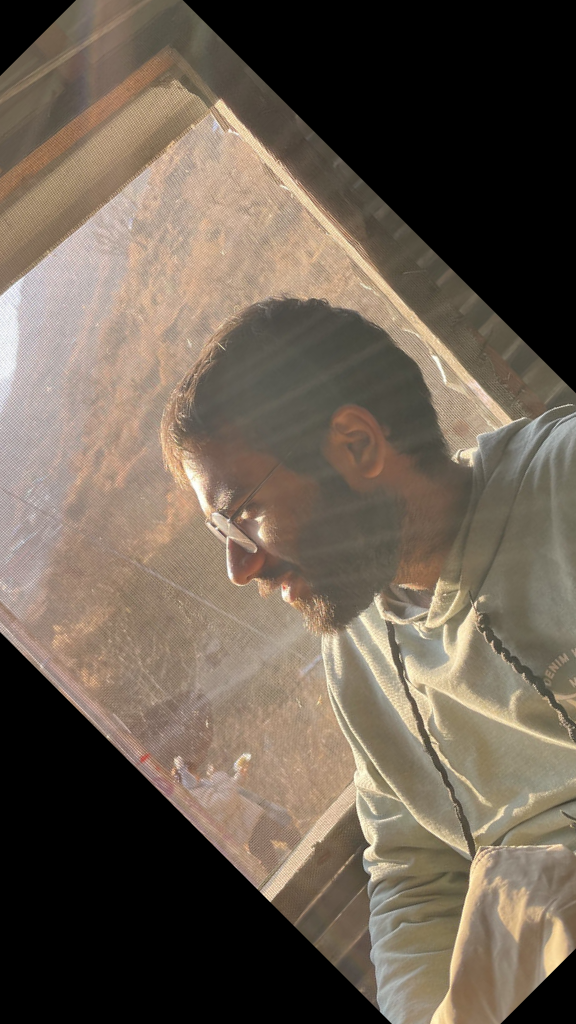

In [19]:
angle = 45  # Rotation angle in degrees
center = (img0.shape[1] // 2, img0.shape[0] // 2)  # Center of the image

# Get Rotation matrix and then apply it using warpAffine
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)  # 1.0 is the scale factor
rotated_image = cv2.warpAffine(img0, rotation_matrix, (img0.shape[1], img0.shape[0]))

showimg(rotated_image)

# Translation

The matrix looks like

$$ \begin{bmatrix} x^{\prime} \\ y^{\prime} \\ 1 \end{bmatrix} = \begin{bmatrix} 1 & 0 & o_x \\ 0 & 1 & o_y  \end{bmatrix} \cdot \begin{bmatrix} x \\ y \\ 1 \end{bmatrix} \, $$
$$ \, $$

where the second vector is in Homogenous Coordinates

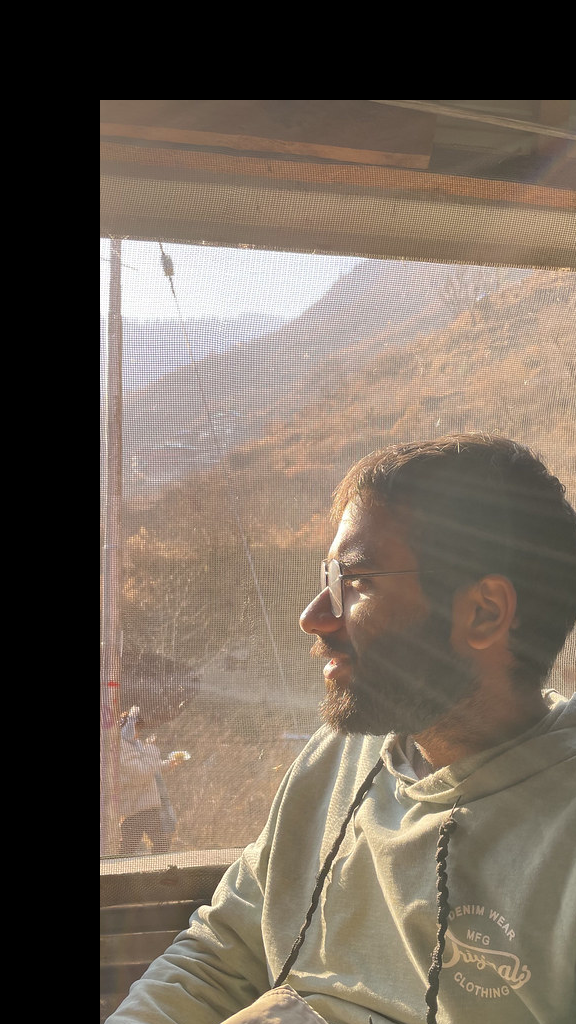

In [20]:
offset_x = 100
offset_y = 100
translation_matrix = np.float32([[
    1, 0, offset_x
], [
    0, 1, offset_y
]])
translated_image = cv2.warpAffine(img0, translation_matrix, (img0.shape[1], img0.shape[0]))
showimg(translated_image)

# Negative of image
- doing (255 - Pixel Values) results in colors in the opposite end of the spectrum



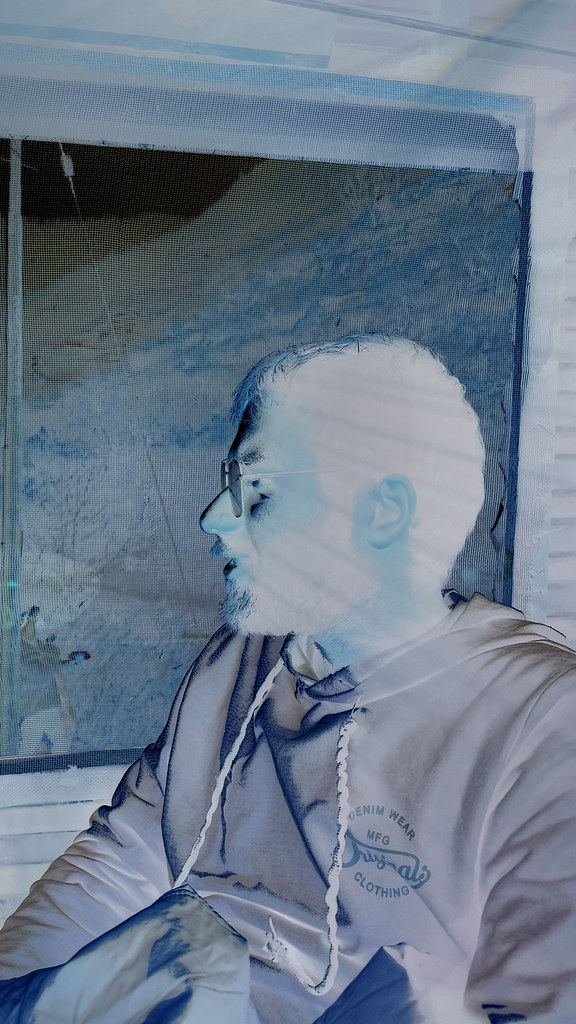

In [21]:
showimg(255 - img0)